# Ejercicio
1. Descargar un dataset de Seaborn interesante.
2. Revisar que no tenga valores nulos.
3. Seleccionar, al menos, 5 variables (como mucho, 10), entre las que que debe haber al menos una continua y una discreta.
4. Quitar los outliers.
5. Realizar un heatmap interesante (siendo distinto del proporcionado).
6. Mostrar una de las variables continuas y su relación frente a otra variable que actúe de objetivo.
7. Mostrar una de las variables discretas y su relación frente a otra variable (la misma del 6) que actúe de objetivo.


## Previos
En primer lugar, vamos a importar las librerías necesarias y, por comodidad, filtrar los avisos que no nos interesan en este ejercicio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

## 1. Descargamos un dataset de Seaborn interesante.

In [3]:
datos = sns.load_dataset('penguins')

In [4]:
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 2. Revisar que no tenga valores nulos.

In [5]:
faltantes = datos.isnull().sum()
faltantes[faltantes>0]

bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
datos.dropna(inplace=True)
datos.reset_index(inplace=True,drop=True)
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
faltantes = datos.isnull().sum()
faltantes[faltantes>0]

Series([], dtype: int64)

## 3. Seleccionar, al menos, 5 variables (como mucho, 10), entre las que que debe haber al menos una continua y una discreta.

In [8]:
df = datos[['island', 'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].copy()

In [9]:
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
3,Torgersen,36.7,19.3,193.0,3450.0
4,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
328,Biscoe,47.2,13.7,214.0,4925.0
329,Biscoe,46.8,14.3,215.0,4850.0
330,Biscoe,50.4,15.7,222.0,5750.0
331,Biscoe,45.2,14.8,212.0,5200.0


## 4. Quitar los outliers.

In [13]:
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
3,Torgersen,36.7,19.3,193.0,3450.0
4,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
328,Biscoe,47.2,13.7,214.0,4925.0
329,Biscoe,46.8,14.3,215.0,4850.0
330,Biscoe,50.4,15.7,222.0,5750.0
331,Biscoe,45.2,14.8,212.0,5200.0


In [14]:
def remove_outliers(df, columns, threshold=1.5):
    """
    Elimina outliers de un DataFrame en las columnas especificadas utilizando el método del rango intercuartil (IQR).

    :param df: DataFrame de pandas
    :param columns: Lista de columnas en las que se deben eliminar los outliers
    :param threshold: Umbral para determinar outliers, el valor predeterminado es 1.5
    :return: DataFrame sin outliers
    """
    df_no_outliers = df.copy()
    
    for column in columns:
        Q1 = df_no_outliers[column].quantile(0.25)
        Q3 = df_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    
    return df_no_outliers

df = remove_outliers(df,['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])

In [15]:
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
3,Torgersen,36.7,19.3,193.0,3450.0
4,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
328,Biscoe,47.2,13.7,214.0,4925.0
329,Biscoe,46.8,14.3,215.0,4850.0
330,Biscoe,50.4,15.7,222.0,5750.0
331,Biscoe,45.2,14.8,212.0,5200.0


## 5. Realizar un heatmap interesante (siendo distinto del proporcionado).

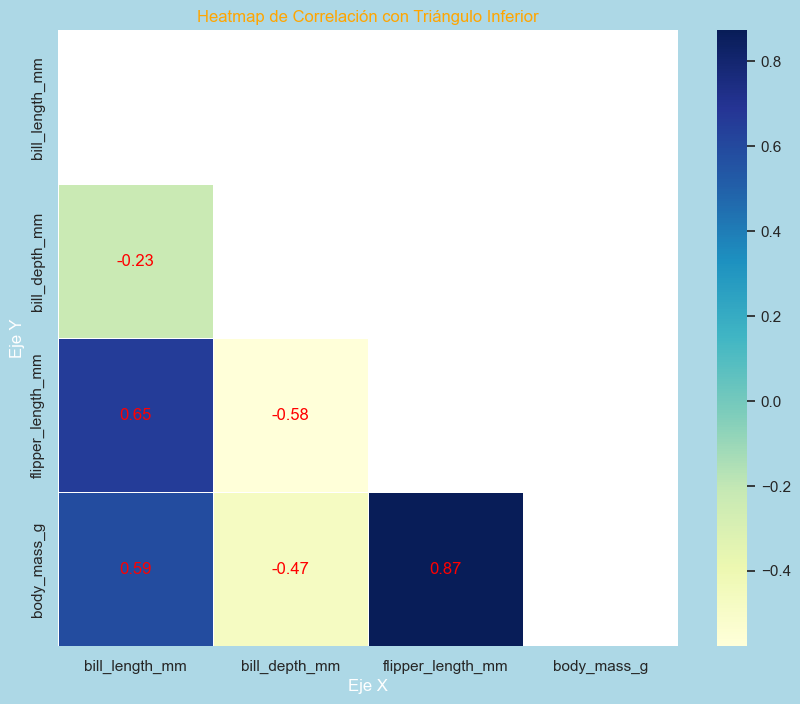

In [25]:

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Ordena la matriz de correlación según la correlación con "body_mass_g"
sorted_corr_matrix = correlation_matrix.sort_values(by='body_mass_g', ascending=False)
sorted_corr_matrix = sorted_corr_matrix.reindex(sorted_corr_matrix.columns, axis=0)

# Crea una máscara triangular inferior
mask = np.triu(np.ones_like(sorted_corr_matrix, dtype=bool))

# Configura el estilo de Seaborn
sns.set(style="white")
sns.set_palette("Set2")

# Crea un heatmap con Seaborn utilizando la máscara
plt.figure(figsize=(10, 8))

# Configuración del texto del annot en rojo
annot_kws = {"color": "red"}

sns.heatmap(sorted_corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, mask=mask, annot_kws=annot_kws)

# Añade un título con color blanco
plt.title("Heatmap de Correlación con Triángulo Inferior", color="orange")

# Hacer el fondo transparente
plt.gcf().set_facecolor('lightBlue')

# Configura el color del título y etiquetas de los ejes en blanco
plt.xlabel("Eje X", color="white")
plt.ylabel("Eje Y", color="white")

# Muestra el heatmap con el colorbar predeterminado
plt.show()


In [26]:
sns.reset_defaults()

## 6. Mostrar una de las variables continuas y su relación frente a otra variable que actúe de objetivo.

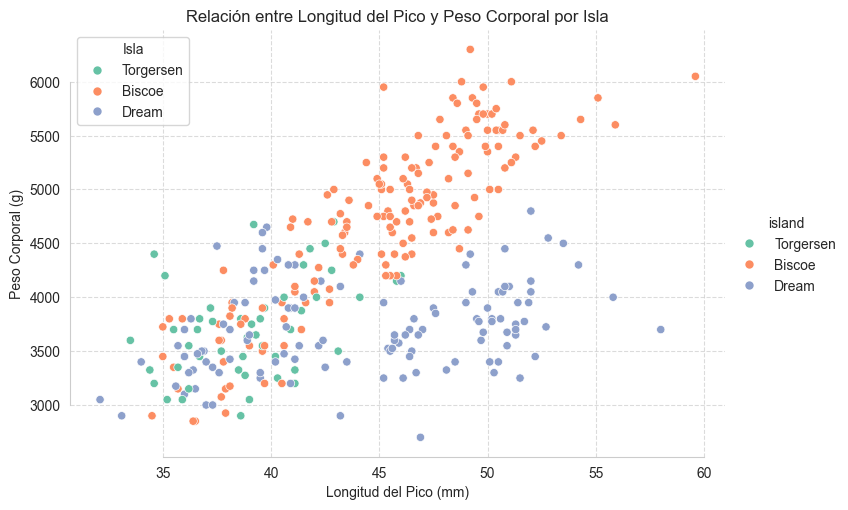

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Crea una gráfica de dispersión más atractiva
g = sns.relplot(data=df, x='bill_length_mm', y='body_mass_g', hue='island', palette="Set2", aspect=1.5)

# Añade un título
g.ax.set_title("Relación entre Longitud del Pico y Peso Corporal por Isla")

# Añade etiquetas a los ejes
plt.xlabel("Longitud del Pico (mm)")
plt.ylabel("Peso Corporal (g)")

# Añade una leyenda
plt.legend(title="Isla")

# Añade más detalles visuales
sns.despine(trim=True)
plt.grid(True, linestyle='--', alpha=0.7)

# Muestra la gráfica de dispersión mejorada
plt.show()


In [30]:
sns.reset_defaults()

## 7. Mostrar una de las variables discretas y su relación frente a otra variable (la misma del 6) que actúe de objetivo.

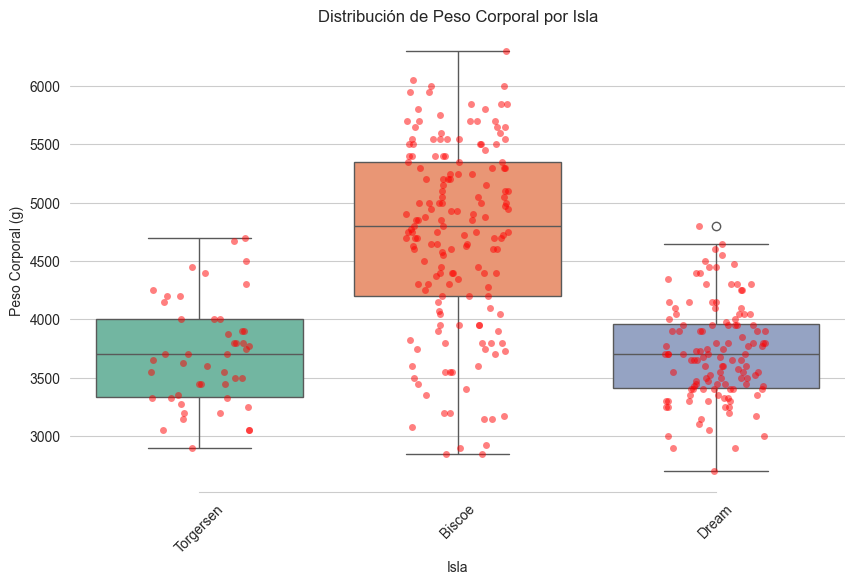

In [27]:
# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Crea una gráfica de caja más atractiva
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='island', y='body_mass_g', palette="Set2")
plt.title("Distribución de Peso Corporal por Isla")

# Añade etiquetas a los ejes
plt.xlabel("Isla")
plt.ylabel("Peso Corporal (g)")

# Añade más detalles visuales
sns.despine(trim=True, left=True)
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mayor legibilidad

# Añade información de los valores atípicos (outliers)
sns.stripplot(data=df, x='island', y='body_mass_g', color='red', jitter=0.2, size=5, alpha=0.5)

# Muestra la gráfica de caja mejorada
plt.show()

In [28]:
sns.reset_defaults()